In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [6]:
cats_path = "D:\\My Folder\\Prodigy Infotech\\Task 3 SVM\\cats"
dogs_path = "D:\\My Folder\\Prodigy Infotech\\Task 3 SVM\\dogs"

In [7]:
IMG_SIZE = (64, 64)

In [8]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            # Open the image, convert to grayscale, and resize
            img = Image.open(filepath).convert("L").resize(IMG_SIZE)
            img_array = np.array(img).flatten()  # Flatten the image
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {filepath}: {e}")
    return images, labels

In [9]:
cats_images, cats_labels = load_images_from_folder(cats_path, label=0) 
dogs_images, dogs_labels = load_images_from_folder(dogs_path, label=1)

In [10]:
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
svm_classifier = SVC(kernel='linear') 

In [13]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = svm_classifier.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=['cats', 'dogs']))

Accuracy: 0.5892857142857143
              precision    recall  f1-score   support

        cats       0.66      0.59      0.62        64
        dogs       0.52      0.58      0.55        48

    accuracy                           0.59       112
   macro avg       0.59      0.59      0.59       112
weighted avg       0.60      0.59      0.59       112



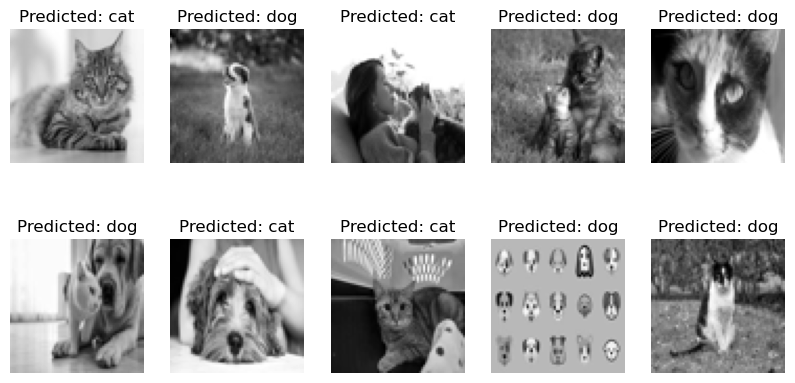

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {'dog' if y_pred[i] == 1 else 'cat'}")
    plt.axis('off')
plt.show()